# Проект: Исследование стартапов

- Автор: Александр Макаров
- Дата: 13.06.2025г.

## Введение

**Цель проекта:**
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Необходимо определить:**
- столбцы по которым можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- значение покупок за 0 или за 1 доллар;
- зависимость цены от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.


**Основные этапы:**
1. Знакомство с данными

    1.1 Вывод общей информации и исправление названий столбцов  
    1.2 Смена типов данных и анализ пропусков
    
    
2. Предобработка данных, предварительное исследование 

    2.1 Изучение раундов финансирования по годам    
    2.2 Изучение информации о людях и их образовании   
    2.3 Выяснение необходимости и возможности объединения таблиц по столбцу network_username   
    2.4 Работа с проблемным датасетом company_and_rounds.csv и причина возникновения пропусков   
    
    
3. Исследовательский анализ объединённых таблиц:

    3.1 Объединение данных   
    3.2 Анализ выбросов     
    3.3 Выяснение причин продажи компаний забесплатно   
    3.4 Цены стартапов по категориям 
    3.5 Изучение количества раундов стартапа до его продажи 
    
    
4. Итоговый вывод 


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv

Загружаем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датафреймы:

In [2]:
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Выводим названия всех столбцов:

In [3]:
dataframes = {
    "acquisition_df": acquisition_df,
    "company_df": company_df,
    "people_df": people_df,
    "education_df": education_df,
    "degrees_df": degrees_df,
    "fund_df": fund_df,
    "investment_df": investment_df
}


for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print("Столбцы:", list(df.columns))


acquisition_df:
Столбцы: ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']

company_df:
Столбцы: ['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round']

people_df:
Столбцы: ['id', 'first_name', 'last_name', 'company_id', 'network_username']

education_df:
Столбцы: ['id', 'person_id', 'instituition', 'graduated_at']

degrees_df:
Столбцы: ['id', 'object_id', 'degree_type', 'subject']

fund_df:
Столбцы: ['id', 'name', 'founded_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'invested_companies', 'milestones']

investment_df:
Столбцы: ['id', 'funding_round_id', 'company_id', 'fund_id']


Т.к. в датафрейме: "company_df" названия столбцов отличаются. Приведим их к стилю snake_case:

In [4]:
company_df.columns = company_df.columns.str.lower().str.replace(' ', '_').str.replace(r'\_+', '_', regex=True)
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

 Выполняем проверку приведения к стилю snake_case

In [5]:
for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print("Столбцы:", list(df.columns))


acquisition_df:
Столбцы: ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']

company_df:
Столбцы: ['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']

people_df:
Столбцы: ['id', 'first_name', 'last_name', 'company_id', 'network_username']

education_df:
Столбцы: ['id', 'person_id', 'instituition', 'graduated_at']

degrees_df:
Столбцы: ['id', 'object_id', 'degree_type', 'subject']

fund_df:
Столбцы: ['id', 'name', 'founded_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'invested_companies', 'milestones']

investment_df:
Столбцы: ['id', 'funding_round_id', 'company_id', 'fund_id']


В company_and_rounds.csv два столбца 'company_id'. Переименуем их:

In [6]:
new_columns = list(company_df.columns)
company_id_indices = [i for i, col in enumerate(new_columns) if col == 'company_id']
if len(company_id_indices) >= 1:
    new_columns[company_id_indices[0]] = 'company_id_x'
if len(company_id_indices) >= 2:
    new_columns[company_id_indices[1]] = 'company_id_y'
company_df.columns = new_columns
print(company_df.columns.tolist())

['company_id_x', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id_y', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']


- Были загружены библиотеки
- Были загружены датасеты
- Названия столбцов были приведены к стилю snake_case
- В company_and_rounds.csv были переименованы стобцы имеющие одинаковые названия. 

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [7]:
for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print("Типы:", df.dtypes)


acquisition_df:
Типы: id                       int64
acquiring_company_id     int64
acquired_company_id      int64
term_code               object
price_amount             int64
acquired_at             object
dtype: object

company_df:
Типы: company_id_x           float64
name                    object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
network_username        object
country_code            object
investment_rounds      float64
funding_rounds         float64
funding_total          float64
milestones             float64
funding_round_id       float64
company_id_y           float64
funded_at               object
funding_round_type      object
raised_amount          float64
pre_money_valuation    float64
participants           float64
is_first_round         float64
is_last_round          float64
dtype: object

people_df:
Типы: id                    int64
first_name      

In [8]:
#изменяем тип для даты и времени
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

company_df['founded_at'] = pd.to_datetime(company_df['founded_at'])
company_df['closed_at'] = pd.to_datetime(company_df['closed_at'])
company_df['funded_at'] = pd.to_datetime(company_df['funded_at'])

education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])

fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])

In [9]:
#Выполняем проверку:
for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print("Типы:", df.dtypes)


acquisition_df:
Типы: id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

company_df:
Типы: company_id_x                  float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_y                  float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation       

In [10]:
for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print(df.info())


acquisition_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB
None

company_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_x         217472 non-null  float64       
 1   name                 217472 non-nu

In [11]:
for df_name, df in dataframes.items():
    print(f"\n{df_name}:")
    print(df.isnull().sum())


acquisition_df:
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

company_df:
company_id_x              302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_y           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

people_df:
id                       0
first_name               5
last_name                1
company_id       

При анализе типов данных, было обнаружено, что все данные с датой и временем, хранятся в типе object. Тип данных был изменен.

Обнаружено что в данных наблюдается большое количество пропусков. 

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [12]:
company_df['year'] = company_df['funded_at'].dt.year

In [13]:
summary_pivot = company_df.pivot_table(
    index='year',
    values='raised_amount',
    aggfunc=['median', 'count']
).reset_index()
summary_pivot.columns = ['year', 'typical_round_size', 'total_rounds']

print(summary_pivot) 

      year  typical_round_size  total_rounds
0   1960.0                 0.0             9
1   1973.0                 0.0             1
2   1974.0                 0.0             2
3   1984.0             41000.0             3
4   1985.0                 0.0             1
5   1987.0           1250000.0             2
6   1989.0             15000.0             1
7   1990.0           1000000.0             1
8   1992.0           2000000.0             1
9   1993.0             62500.0             2
10  1994.0           6700000.0             2
11  1995.0           2000000.0             7
12  1996.0             12500.0             7
13  1997.0           3300000.0             9
14  1998.0            100000.0            29
15  1999.0           2000000.0            76
16  2000.0           4200000.0           125
17  2001.0           3000000.0            96
18  2002.0           4200000.0           116
19  2003.0           3000000.0           159
20  2004.0           5000000.0           291
21  2005.0

In [14]:
filtered_summary_pivot = summary_pivot[summary_pivot['total_rounds'] > 50]
print(filtered_summary_pivot)

      year  typical_round_size  total_rounds
15  1999.0           2000000.0            76
16  2000.0           4200000.0           125
17  2001.0           3000000.0            96
18  2002.0           4200000.0           116
19  2003.0           3000000.0           159
20  2004.0           5000000.0           291
21  2005.0           5500000.0          1633
22  2006.0           5000000.0          2436
23  2007.0           3973320.0          3279
24  2008.0           3110000.0          3774
25  2009.0           2000000.0          4151
26  2010.0           1602500.0          6221
27  2011.0           1200000.0          9204
28  2012.0           1000000.0          9970
29  2013.0           1200000.0         11072


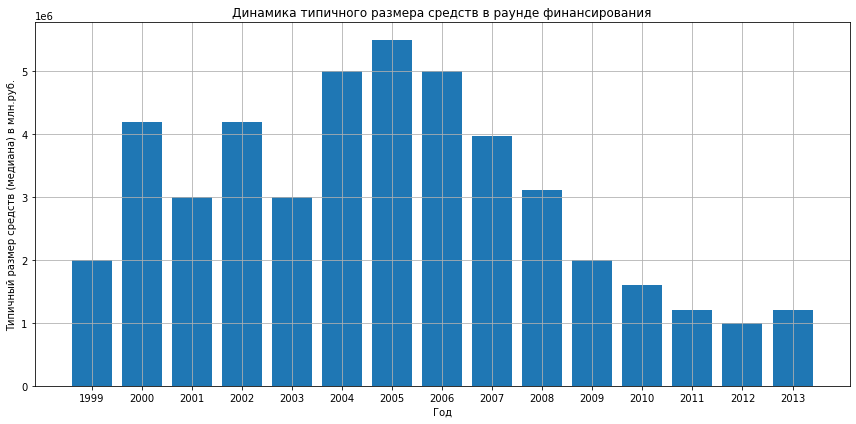

In [15]:
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_summary_pivot['year'], filtered_summary_pivot['typical_round_size'])

plt.title('Динамика типичного размера средств в раунде финансирования')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (медиана) в млн.руб.')
plt.grid()
plt.xticks(filtered_summary_pivot['year'])
plt.tight_layout()
plt.show()

**Вывод:**

- В 2005 году был максимальный (5,5 млн.руб.) типичный размер собранных в рамках одного раунда средств.
- После макисмума в 2005 году, дальнейший сбор с каждым годом постепенно снижался, и только в 2013 году сбор показал положительную динамику по отношению к предыдущему году.

### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [16]:
people_ed = pd.merge(
    people_df, 
    education_df, 
    left_on='id',
    right_on='person_id',
    how='left'   
)

In [17]:
# Добавляем столбец 'has_education', для оценки наличия информации об образовании у сотрудника
people_ed['has_education'] = people_ed['person_id'].notna()
people_ed

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,has_education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,False
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,True
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,True
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,False


In [18]:
company_stats = people_ed.groupby('company_id').agg(
    total_employees=('id_x', 'count'),
    employees_with_education=('has_education', 'sum')
).reset_index()

company_stats['missing_education_ratio'] = 1 - (company_stats['employees_with_education'] / company_stats['total_employees'])
company_stats['missing_education_ratio, %'] = round((1 - (company_stats['employees_with_education'] / company_stats['total_employees']))*100,2)
company_stats

,company_id,total_employees,employees_with_education,missing_education_ratio,"missing_education_ratio, %"
0,1.0,3,2,0.333333,33.33
1,2.0,1,1,0.000000,0.00
2,3.0,5,4,0.200000,20.00
3,4.0,18,17,0.055556,5.56
4,5.0,84,68,0.190476,19.05
...,...,...,...,...,...
22917,285897.0,2,2,0.000000,0.00
22918,285953.0,1,0,1.000000,100.00
22919,285972.0,2,1,0.500000,50.00
22920,285996.0,1,1,0.000000,0.00


In [19]:
max_employees = company_stats['total_employees'].max()
min_employees = company_stats['total_employees'].min()
mean_employees = company_stats['total_employees'].mean()

print('Максимальное количество сотрудников в компании:', max_employees)
print('Минимальное количество сотрудников в компании:', min_employees)
print('Среднее количество сотрудников в компании:', round(mean_employees,2))

Максимальное количество сотрудников в компании: 376
Минимальное количество сотрудников в компании: 1
Среднее количество сотрудников в компании: 1.95


In [20]:
people_c = company_stats['total_employees'].value_counts().sort_index()
people_c

1      14150
2       4735
3       1857
4        831
5        447
6        259
7        161
8        115
9         86
10        51
11        52
12        25
13        26
14        12
15        14
16        12
17         8
18        16
19        10
20         9
21         1
22         3
23         1
24         2
25         4
26         2
27         3
28         1
29         2
30         2
34         2
35         2
39         2
42         1
43         1
44         2
46         1
52         1
59         1
64         1
66         1
70         1
71         1
73         1
80         1
84         1
89         1
111        1
192        1
221        1
376        1
Name: total_employees, dtype: int64

In [21]:
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

company_stats['company_size'] = pd.cut(
    company_stats['total_employees'], 
    bins=bins,
    labels=labels,
    include_lowest=True  
)

print(company_stats[['company_id', 'total_employees', 'company_size']])

       company_id  total_employees company_size
0             1.0                3            3
1             2.0                1            1
2             3.0                5          4-5
3             4.0               18        11-25
4             5.0               84          26+
...           ...              ...          ...
22917    285897.0                2            2
22918    285953.0                1            1
22919    285972.0                2            2
22920    285996.0                1            1
22921    286091.0                7         6-10

[22922 rows x 3 columns]


In [22]:
size_counts = company_stats['company_size'].value_counts().sort_index()
size_counts

1        14150
2         4735
3         1857
4-5       1278
6-10       672
11-25      195
26+         35
Name: company_size, dtype: int64

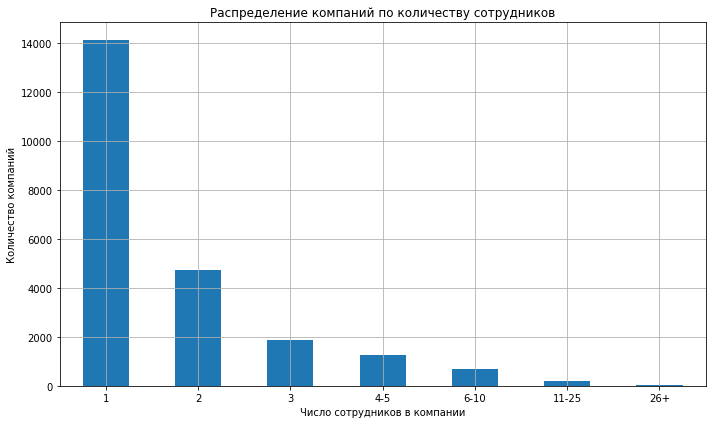

In [23]:
plt.figure(figsize=(10, 6))
size_counts.plot(kind='bar')

plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Число сотрудников в компании')
plt.ylabel('Количество компаний')
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
size_group_stats = company_stats.groupby('company_size').agg(
    avg_missing_education=('missing_education_ratio', 'mean'),
    count_companies=('company_id', 'count')
).reset_index()

print('Средняя доля сотрудников без информации об образовании по размеру компаний:')
print(size_group_stats[['company_size', 'avg_missing_education', 'count_companies']])

Средняя доля сотрудников без информации об образовании по размеру компаний:
  company_size  avg_missing_education  count_companies
0            1               0.592297            14150
1            2               0.226610             4735
2            3               0.227428             1857
3          4-5               0.275743             1278
4         6-10               0.311749              672
5        11-25               0.306125              195
6          26+               0.203482               35


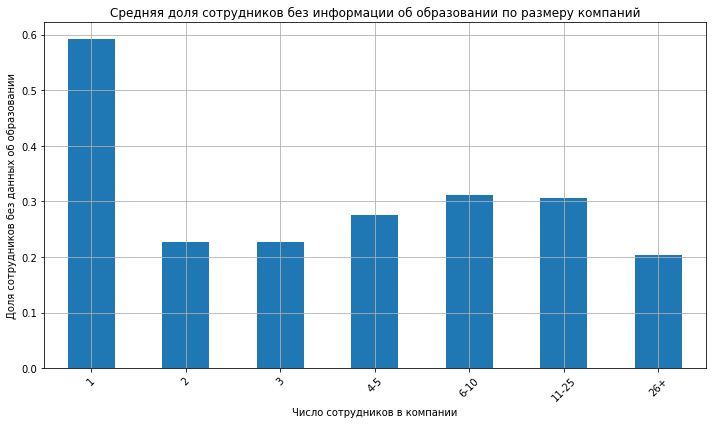

In [25]:
plt.figure(figsize=(10, 6))
size_group_stats.set_index('company_size')['avg_missing_education'].plot(
    kind='bar',
    title='Средняя доля сотрудников без информации об образовании по размеру компаний'
)
plt.ylabel('Доля сотрудников без данных об образовании')
plt.xlabel('Число сотрудников в компании')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

- На основе столбца 'has_education' были расчитаны пропущенные данные об образовании (долю и %)
- На основе общей статистики по компаниям сгруппировали все компании в 7 групп: 
    - 1 человек;
    - 2 человека;
    - 3 человека;
    - 4-5 человек;
    - 6-10 человек;
    - 11-25 человек;
    - 26+.

Выбор групп был основан на том, что присутствует большое количество компаний, с малым числом сотрудников, и всего 26 компаний, в которых сотрудников более 25. 
- Было обнаружено, что наибольшая доля пропущенных значений по образованию присутствует в компаниях из 2х человек (в среднем  59% пропусков), а наименьшее -  в компания с количеством сотрудников более 25 (26+) (в среднем 20% пропусков) 

In [26]:
# Проверяем возможность объединения датафреймов: 
print(f"Уникальных записей в education_df: {education_df['person_id'].nunique()}")
print(f"Уникальных записей в degrees_df: {degrees_df['object_id'].nunique()}")

common_people = set(education_df['person_id']).intersection(set(degrees_df['object_id']))
print(f"Количество людей, присутствующих в обоих датасетах: {len(common_people)}")
print(f"Примерная доля покрытия: {len(common_people)/len(education_df):.2%}")

Уникальных записей в education_df: 68451
Уникальных записей в degrees_df: 68451
Количество людей, присутствующих в обоих датасетах: 0
Примерная доля покрытия: 0.00%


In [27]:
# Для выполнения задания можно присоединить и degrees_df по полю object_id (в нем нет пропусков)
# Но т.к. это поле хранится в типе object, нужна замена на int64
degrees_df['object_id'] = (
    degrees_df['object_id']
    .astype(str)
    .str.replace('p:', '', regex=False)
)

degrees_df['object_id']=degrees_df['object_id'].astype(int)
degrees_df['object_id']

0           6117
1           6136
2           6136
3           6005
4           5832
           ...  
109605    268589
109606    268527
109607    268527
109608    268528
109609    268528
Name: object_id, Length: 109610, dtype: int32

In [28]:
people_d_ed = pd.merge(
    people_ed, 
    degrees_df, 
    left_on='person_id',
    right_on='object_id',
    how='left'   
)

people_d_ed

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,has_education,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370831,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN
370832,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,True,25958.0,174088.0,M.B.B.S.,Medicine
370833,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,True,18871.0,118386.0,PhD,Journalism
370834,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,False,NaN,NaN,NaN,NaN


**Вывод:**
- Присутствует много пропусков в информации об образовании. При этом наибольшее количество пропусков у компаний с маленьким количеством сотрудников, а наименьшее - у компаний с большим количеством сотрудников.
- Объндинение датафреймов возможно, но оно не требудется для выпполнения задания.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных

In [29]:
network_username_dfs = {name: df for name, df in dataframes.items() if 'network_username' in df.columns}

if not network_username_dfs:
    print('Столбец network_username не найден ни в одном датасете')
else:
    print(f'Столбец network_username найден в {len(network_username_dfs)} датасетах:')
    print(list(network_username_dfs.keys()))

Столбец network_username найден в 3 датасетах:
['company_df', 'people_df', 'fund_df']


In [30]:
for name, df in [x for x in dataframes.items() if 'network_username' in x[1].columns]:
    print(f'\n Датасет: {name}')
    print('Всего строк:', len(df))
    print('Уникальных значений:', df['network_username'].nunique())
    print('Пропущенных значений:', df['network_username'].isna().sum())


 Датасет: company_df
Всего строк: 217774
Уникальных значений: 79571
Пропущенных значений: 122240

 Датасет: people_df
Всего строк: 226709
Уникальных значений: 38421
Пропущенных значений: 187842

 Датасет: fund_df
Всего строк: 11652
Уникальных значений: 2098
Пропущенных значений: 9503


In [31]:
if sum('network_username' in df.columns for df in dataframes.values()) > 1:
    print("\nАнализ пересечений:")
    
    valid_dfs = [(name, df) for name, df in dataframes.items() 
                if 'network_username' in df.columns]
    
    for i in range(len(valid_dfs)):
        for j in range(i+1, len(valid_dfs)):
            name1, df1 = valid_dfs[i]
            name2, df2 = valid_dfs[j]

            set1 = set(df1['network_username'].dropna().unique())
            set2 = set(df2['network_username'].dropna().unique())
            common = set1 & set2
            
            print(f"\n{name1} vs {name2}:")
            print('Общих значений:', len(common))
            if len(common) > 0:
                coverage1 = len(common)/len(set1)
                coverage2 = len(common)/len(set2)
                print(f"Покрытие {name1}: {coverage1:.1%}")
                print(f"Покрытие {name2}: {coverage2:.1%}")
else:
    print('Недостаточно датасетов для анализа пересечений')


Анализ пересечений:

company_df vs people_df:
Общих значений: 2199
Покрытие company_df: 2.8%
Покрытие people_df: 5.7%

company_df vs fund_df:
Общих значений: 70
Покрытие company_df: 0.1%
Покрытие fund_df: 3.3%

people_df vs fund_df:
Общих значений: 79
Покрытие people_df: 0.2%
Покрытие fund_df: 3.8%


**Вывод**:
- network_username нельзя использовать для объединения, так как мало совпадений между данными. Наибольшее количество совпадений у company_df и people_df (2199 шт)
- Столбцы с этим названием нельзя использовать для объединения 


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [32]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_x         217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [33]:
company_df.isnull().sum()

company_id_x              302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_y           164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
year                   165094
dtype: int64

In [34]:
print("\nУникальные компании:", company_df['name'].nunique())


Уникальные компании: 196506


In [35]:
companies = company_df[[
    'company_id_x', 
    'name', 
    'category_code', 
    'status',
    'founded_at', 
    'closed_at', 
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]].drop_duplicates(subset=['company_id_x'])

In [36]:
rounds = company_df[[
    'company_id_y',
    'funding_round_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round'
]].copy()

In [37]:
rounds.set_index(['company_id_y', 'funding_round_id'], inplace=True)

In [38]:
print(f"Найдено дубликатов раундов: {rounds.index.duplicated().sum()}")
rounds = rounds[~rounds.index.duplicated(keep='first')]

Найдено дубликатов раундов: 164845


In [39]:
companies_without_rounds = companies.index.difference(rounds.index.get_level_values(0))
print(f"Компаний без раундов: {len(companies_without_rounds)}")

Компаний без раундов: 173960


In [40]:
rounds_without_companies = rounds.index.get_level_values(0).difference(companies.index)
print(f"Раундов без компаний: {len(rounds_without_companies)}")

Раундов без компаний: 9346


In [41]:
print("\nРезультат преобразования:")
print(f"Компании: {companies.shape[0]} записей")
print(f"Раунды: {rounds.shape[0]} записей")
print("\nСтруктура таблицы компаний:")
print(companies.info())
print("\nСтруктура таблицы раундов:")
print(rounds.info())


Результат преобразования:
Компании: 196554 записей
Раунды: 52929 записей

Структура таблицы компаний:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_x       196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 1

**Вывод**:

При работе с company_and_rounds.csv,стало понятно, что он является объединением двух таблиц, содержащих информацию отдельно о компаниях и отдельно о раундах финансирования. Большое количество пропусков можно объяснить тем что изначальные таблицы содержали разный объем данных..
- Исходя из названий столбцов, датафрейм  'company_and_round' был разделен на два датафрейма companies и rounds
- В df companies индексом стало поле 'company_id_x'
- В df rounds мультиндексом стало поле 'company_id_y' и 'funding_round_id'
- Было найдено:164846 компаний без информации о раундах 232 раунда без информации о компаниях
- Датафрейм companies содержит 196554 строчек и 13 столбцов
- Датафрейм rounds содержит 52929 строчек и 7 столбцов


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [42]:
suitable_companies = companies[
    (companies['funding_rounds'] > 0) | 
    (companies['investment_rounds'] > 0) |
    (companies['status'] == 'acquired')
].copy()

print('Найдено', len(suitable_companies), 'компаний, подходящих по критериям')

Найдено 40747 компаний, подходящих по критериям


In [43]:
suitable_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_x       40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [44]:
print(suitable_companies.isnull().mean().sort_values(ascending=False))

closed_at            0.947775
network_username     0.488306
founded_at           0.317569
country_code         0.147373
category_code        0.133310
domain               0.122537
company_id_x         0.000000
name                 0.000000
status               0.000000
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64


**Вывод:**

- Таблица корректна. 
- Получившийся датафрейм interested_companies содержит 40747 строк и 13 столбцов
- В половине столбцов присутствуют пропуски (наибольшее количество в столбце 'closed_at', почти 95%).

### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [45]:
funding_stats = suitable_companies['funding_total'].describe()
print("Основные статистики funding_total:")
print(funding_stats.to_string())

Основные статистики funding_total:
count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09


Text(0, 0.5, 'Количество компаний')

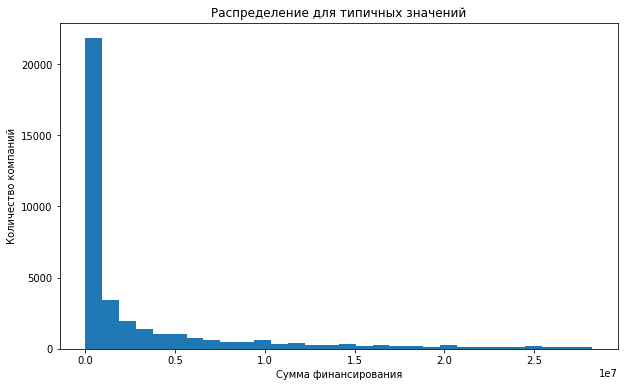

In [46]:
plt.figure(figsize=(10, 6))

plt.subplot()
suitable_companies[suitable_companies['funding_total'] < funding_stats['75%'] * 5]['funding_total'].plot(
    kind='hist',
    bins=30
)
plt.title('Распределение для типичных значений')
plt.xlabel('Сумма финансирования')
plt.ylabel('Количество компаний')

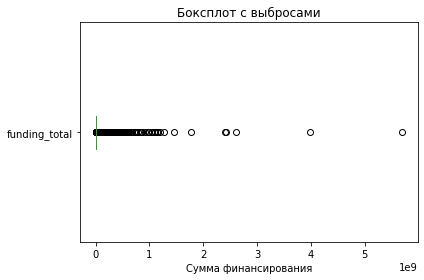

In [47]:
plt.subplot()
suitable_companies['funding_total'].plot(
    kind='box',
    vert=False,
    patch_artist=True,
    boxprops=dict()
)
plt.title('Боксплот с выбросами')
plt.xlabel('Сумма финансирования')

plt.tight_layout()
plt.show()

In [48]:
Q1 = funding_stats['25%']
Q3 = funding_stats['75%']
IQR = Q3 - Q1
typical_lower = max(0, Q1 - 1.5 * IQR) # т.к. нижняя граница не может быть ниже нуля
typical_upper = Q3 + 1.5 * IQR

In [49]:
typical_funding = suitable_companies[
    (suitable_companies['funding_total'] >= typical_lower) & 
    (suitable_companies['funding_total'] <= typical_upper)
]['funding_total']

outliers = suitable_companies[
    (suitable_companies['funding_total'] < typical_lower) | 
    (suitable_companies['funding_total'] > typical_upper)
]['funding_total']

In [50]:
print(f"\nТипичный диапазон финансирования: от {typical_lower:,.0f} до {typical_upper:,.0f}")
print(f"Количество типичных компаний: {len(typical_funding)} ({len(typical_funding)/len(suitable_companies):.1%})")
print(f"Количество выбивающихся компаний: {len(outliers)}")


Типичный диапазон финансирования: от 0 до 14,126,625
Количество типичных компаний: 34889 (85.6%)
Количество выбивающихся компаний: 5858


**Вывод:**

- Была проведена работа с датафреймом interested_companies
- При выводе типичных статистик методом .describe(), видим что, среднее и медиана сильно разнятся по значениям, следовательно мы будем иметь дело с выбросами.
- После постраения столбчатой диаграммы становится видно что подавляющее количество компаний получают маленькое финансирование (типичные значения)
- Построили "ящик с усами", чтобы оценить выбросы. 
- Вывели типичный диапазон финансирования, который показал интересные результаты (от 0 млн до 14 млн), также мы узнали, что 85,6% компаний считаются "типичными", а количество выбивающихся равняется 5858


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [51]:
# Объединяем таблицы, чтобы получить столбец с ценой покупки компании
companies_ac = pd.merge(
    suitable_companies,
    acquisition_df,
    left_on='company_id_x',
    right_on='acquired_company_id',
    how='inner'
)
companies_ac

,company_id_x,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1,11,10,NaN,20000000,2007-05-30
1,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20,377,100,cash,0,2005-05-29
2,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901,5,1001,cash_and_stock,47500000,2009-08-10
3,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878,23054,10014,NaN,0,2010-09-30
4,100265.0,Coastal Supply Company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,6106,38215,100265,NaN,0,2011-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,11484.0,Networktise,web,acquired,2008-08-01,NaT,networktise.com,NaN,NaN,0.0,0.0,0.0,0.0,8605,205151,11484,NaN,0,2013-05-10
9386,153326.0,Yoke,web,acquired,NaT,NaT,apps.socialnet.com::yokeapp,NaN,NaN,0.0,1.0,500000.0,1.0,7948,2352,153326,NaN,0,2012-09-11
9387,53224.0,UberNetwork,web,acquired,NaT,NaT,ubernetwork.com::,NaN,NaN,0.0,0.0,0.0,1.0,5034,45529,53224,NaN,0,2011-01-23
9388,69612.0,Networkcism,NaN,acquired,NaT,NaT,networkcism.com,NaN,NaN,0.0,0.0,0.0,0.0,5189,22309,69612,NaN,0,2011-02-23


In [52]:
zero_acquisitions = companies_ac[
    (companies_ac['price_amount'].isin([0, 1])) &
    (companies_ac['funding_total'] > 0)
]

print('Найдено', len(zero_acquisitions), 'компаний, с ненулевым финансированием, проданных за $0 или $1')

Найдено 1618 компаний, с ненулевым финансированием, проданных за $0 или $1


In [53]:
funding_stats = zero_acquisitions['funding_total'].describe()
print(funding_stats.to_string())

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09


In [54]:
Q1 = funding_stats['25%']
Q3 = funding_stats['75%']
IQR = Q3 - Q1
IQR

13500000.0

In [55]:
lower_bound = max(0, Q1 - 1.5 * IQR) 
upper_bound = Q3 + 1.5 * IQR
print('Нижняя граница, соответствующая 5-му перцентилю:', lower_bound)
print('Верхняя граница, соответствующая 95-му перцентилю:', upper_bound)

Нижняя граница, соответствующая 5-му перцентилю: 0
Верхняя граница, соответствующая 95-му перцентилю: 35750000.0


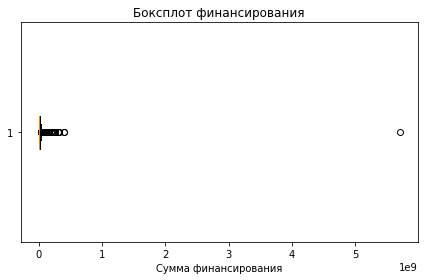

In [56]:
filtered_data = zero_acquisitions['funding_total']
plt.boxplot(filtered_data, vert=False)
plt.title('Боксплот финансирования')
plt.xlabel('Сумма финансирования')
plt.tight_layout()
plt.show()

**Вывод:**

- Количество компаний сумма продажи которых составила 0 или 1 доллар, равняется 1618.
- При использовании метода .describe(), видим что, среднее и медиана сильно разнятся по значениям, следовательно мы будем иметь дело с выбросами
- Расчитали размах вариации IQR, он равен 13.500.000, что означает, что между 3 и 1 перцентилем разница в 13.5 млн
- Были рассчитаны верхняя и нижняя границы выбросов. Таким образом:
    - Нижняя граница - 0;
    - Верхняя граница - 35750000.
- Нижняя граница соответствует 5-му перцентилю, а верхняя - 95-му;
- На "ящике с усами", четко видны выбросы.

### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [57]:
valid_acquisitions = companies_ac[companies_ac['price_amount'] > 0]

In [58]:
category_stats = valid_acquisitions.groupby('category_code')['price_amount'].agg([
    ('count', 'count'),
    ('median_price', 'median'),
    ('mean_price', 'mean'),
    ('std_price', 'std'),
    ('min_price', 'min'),
    ('max_price', 'max'),
    ('price_range', lambda x: x.max() - x.min()),
    ('coef_of_variation', lambda x: x.std() / x.mean())
]).sort_values('count', ascending=False)
category_stats.head()

,count,median_price,mean_price,std_price,min_price,max_price,price_range,coef_of_variation
category_code,,,,,,,,
software,403,48140000,3.907541e+08,1.204059e+09,1858,10200000000,10199998142,3.081372
biotech,263,200000000,7.359153e+08,1.968195e+09,109000,20000000000,19999891000,2.674486
web,260,55500000,2.767767e+08,6.954405e+08,5000,6400000000,6399995000,2.512641
mobile,117,56000000,3.529187e+08,1.319472e+09,5000,12500000000,12499995000,3.738741
enterprise,116,54750000,2.295955e+10,2.413581e+11,20000,2600000000000,2599999980000,10.512320


In [59]:
top_median = category_stats.sort_values('median_price', ascending=False)
top_median.head(5)

,count,median_price,mean_price,std_price,min_price,max_price,price_range,coef_of_variation
category_code,,,,,,,,
automotive,3,2400000000,2.547667e+09,2.581669e+09,43000000,5200000000,5157000000,1.013347
sports,2,622500000,6.225000e+08,5.126524e+08,260000000,985000000,725000000,0.823538
nanotech,1,584000000,5.840000e+08,NaN,584000000,584000000,0,NaN
real_estate,6,400000000,1.465500e+09,2.676302e+09,3000000,6850000000,6847000000,1.826204
manufacturing,21,351000000,8.137572e+08,1.060435e+09,373,4050000000,4049999627,1.303134


In [60]:
top_variation = category_stats.sort_values('coef_of_variation', ascending=False)
top_variation.head(5)

,count,median_price,mean_price,std_price,min_price,max_price,price_range,coef_of_variation
category_code,,,,,,,,
enterprise,116,54750000,2.295955e+10,2.413581e+11,20000,2600000000000,2599999980000,10.512320
other,84,71550000,5.287721e+08,2.060861e+09,1,18400000000,18399999999,3.897446
public_relations,74,110000000,1.820631e+09,6.854338e+09,25000,39000000000,38999975000,3.764815
mobile,117,56000000,3.529187e+08,1.319472e+09,5000,12500000000,12499995000,3.738741
consulting,32,32150000,2.936716e+08,1.018109e+09,400000,5750000000,5749600000,3.466829


**Вывод:**
- Решено было отбирать по 5 категорий стартапов, ведь этого количества достаточно для выявления наиболее ярких данных и данное количество является минимально репрезентативным. 
- Для отбора топ-5 категорий по типично высоким ценам в роли показателя была выбрана медиана, она менее чувствительна к выбросам:
    по медианной цене в топ-5 категорий попали: automative, sports, nanotech, real_estate, manufacturing.
- Для отбора топ-5 категорий по наибольшему разбросу цен в роли показателя был выбран коэффициент вариации:
    по коэффициенту вариации в топ-5 категорий: enterprise, other, public_relations, mobile, consulting. 

### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [61]:
suitable_companies['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [62]:
status_stats = suitable_companies.groupby('status')['funding_rounds'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).reset_index()

status_stats

,status,count,mean,median,std,min,max
0,acquired,9394,0.523526,0.0,1.081739,0.0,12.0
1,closed,2092,1.381453,1.0,0.835488,0.0,8.0
2,ipo,640,1.934375,1.0,2.217177,0.0,13.0
3,operating,28621,1.522658,1.0,1.214554,0.0,15.0


In [63]:
print('Типичное количество раундов для каждого возможного статуса:')
print(status_stats[['status', 'mean']])

Типичное количество раундов для каждого возможного статуса:
      status      mean
0   acquired  0.523526
1     closed  1.381453
2        ipo  1.934375
3  operating  1.522658


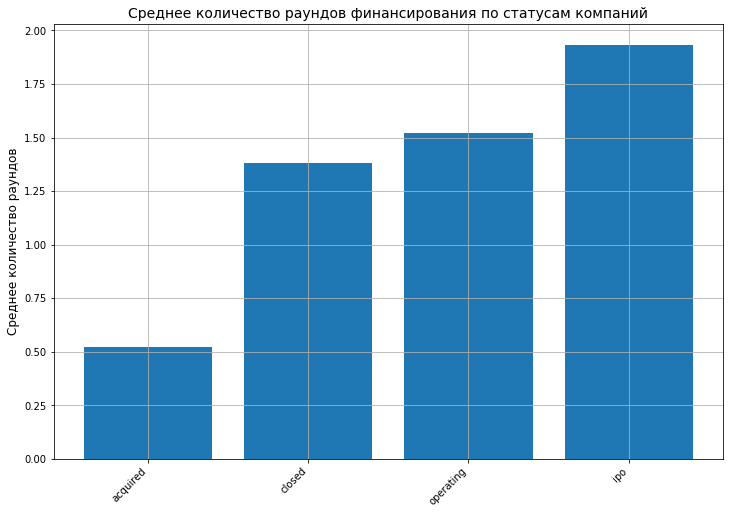

In [64]:
status_stats = status_stats.sort_values(by='mean')
plt.figure(figsize=(12, 8))

bars = plt.bar(
    status_stats['status'],
    status_stats['mean']
)
plt.title('Среднее количество раундов финансирования по статусам компаний', fontsize=14)
plt.ylabel('Среднее количество раундов', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid()
plt.show()

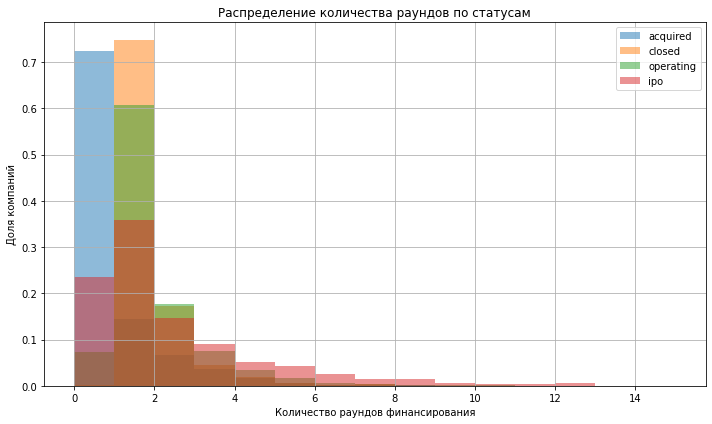

In [65]:
plt.figure(figsize=(10, 6))
for status in status_stats['status']:
    subset = suitable_companies[suitable_companies['status'] == status]['funding_rounds']
    plt.hist(
        subset, 
        bins=range(0, int(subset.max())+1, 1), 
        alpha=0.5, 
        label=status,
        density=True
    )

plt.title('Распределение количества раундов по статусам')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Доля компаний')
plt.legend()
plt.grid()
plt.xlim()

plt.tight_layout()
plt.show()

**Вывод:**
- Был произведен анализ значений в столбце: среднее и медиана не сильно отличаются, следовательно можно сделать вывод о том, что выбросов в значениях не наблюдается. Об этом же свидетельствуют нормальные значения в минимальном и максимальном значении (0 и 15, соответственно)
- Была произведена группировка компаний по статусам
- Для анализа "типичного" значения раундов финасирования в роли показателя было выбрано среднее арифметическое. Наибольшее типичное количество раундов финансирования принадлежит статусу "ipo"(первичное публичное размещение акций компании на фондовой бирже), а наименьшее - "acquired"(стартап был куплен другой компанией)
- Этот же результат виден на графике 
- Был построен график распределения количества раундов финансирования в зависимости от статуса компании


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

## Шаг 4. Итоговый вывод и рекомендации

**Шаг 1**:
- Cначала было произведено знакомство с данными: выведены все датафреймы, а также информация по ним.
- В дальнейшем была осуществлена работа с типами данных: все данные даты и времени хранились в типе object, поэтому этот тип был изменен на datetime64[ns] 

**Шаг 2**:
- Для начала был выведен год из таблицы company_df и на основе этих данных была составлена сводная таблица по среднему размеру финансирования в зависимости от года. Так выяснилось, что наибольшее финансирование получили компании в 2005 году, а наименьшее в 2012. После макисмума в 2005 году, дальнейший сбор с каждым годом постепенно снижался, и только в 2013 году сбор показал положительную динамику по отношению к предыдущему году.
- Далее была работа с таблицами people и education. Эти таблицы было необходимо объединить. После объединения таблиц была проведена группировка компаний по количеству сотрудников. Витоге получилось 6 групп: 1 сотрудник, 2 сотрудника, 3 сотрудника, 4-5 сотрудников, 6-10 сотрудников, 11-25 сотрудников и 26+ сотрудников. Далее был получен результат, что в компаниях, состоящих из 1 человека доля пропущенных данных об образовании самая высокая (около 59%), а наименьшая доля пропусков принадлежит компаниям с 26+ человек (около 20%)
- Было необходимо выяснить можно ли объединить таблицы по столбцу network_username, так как он часто встречается в данных. Однако выяснилось, что столбец network_username нельзя использовать для объединения, так как совпадений между данными совсем мало
- Была произведена работа с таблицей companies_and_rounds.csv. Выяснилось, что ранее этот датафрейм состоял из двух отдельных таблиц: companies и rounds. Из-за объединения таблиц в датафрейме возникло так много пропусков, что и стало основной их причиной. Чтобы в последующем работать с данными было более, этот датафрейм был разделен на два, и в последствии работали с каждой из таблиц отдельно.

**Шаг 3**:
- Был сформирован новый датафрейм 'interested_companies', в которых входят только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired.
- Далее была осуществлена работа с выбросами: выбросов в данных  много, однако в результате выяснилось, что 85,6% компания считаются типичными.
- Была проведена работа с компаниями, которые были проданы за 0 или 1 доллар. Выяснилось, что таких компаний 1618 штук. При этом мы также имели дело с выбросами. Нижняя граница выбросов равнялась 0 (5-й перцентиль), а верхняя граница - 37.500.000 95-й прецентель).
- Далее работали с ценой стартапа в зависимости от категорий. В качестве типичного значения стоимости компании была выбрана медиана, так как она более устойчива к выбросам. Итого по медианной цене в топ-5 категорий попали такие из них, как: automative, sports, nanotech, real_estate, manufacturing. Для отбора топ-5 категорий по наибольшему разбросу цен в роли показателя был выбран коэффициент вариации: Итого по коэф. вариации в топ-5 категорий попали такие из них, как: enterprise, other, public_relations, mobile, consulting.
- На последнем шаге разбирали сколько раундов финансирования пройдет стартап то его продажи. Для этого сгруппировали данные по статусу компании. Наибольшее типичное количество раундов финансирования принадлежит статусу "ipo"(первичное публичное размещение акций компании на фондовой бирже), а наименьшее - "acquired"(стартап был куплен другой компанией).

**Рекомендации:**
- В 2013 году наблюдался небольшой рост финасирования компаний, рекомендуется оценить объем финасирования в последующих годах, для понимания необходимого объема средств.
- Следует обратить внимание на данные об образовании сотрудников в компаниях, так как чаще всего в маленький стартапах (1 чел.) эти данные могут отсутствовать.
- К объеденению датасетов следует пртбегать с повышенногй внимательностью, чтобы итоговая таблица содержала актуальные данные и не вводила в заблуждение при анализе.
- По медианной цене самые дорогие компании принадлежат категориям automative, sports, nanotech, real_estate, manufacturing. Но к этим категориям следует относиться с соторожностью, ведь сумма вложений может быть большой и последующая перепродажа компании может быть затруднительна. 
- К покупке рекомендуются компании со статусом 'ipo', так как этот статус означает первичное публичное размещение акций компании на фондовой бирже, а значит такой стартап будет проще купить и проще перепродать.